# Proyek Analisis Data: PRSA_Data_Shunyi_20130301-20170228
- **Nama:** Aloysius Bertyaswidi Utama
- **Email:** m232b4ky0413@bangkit.academy
- **ID Dicoding:** aloysiusbertyaswidi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada tren penurunan atau peningkatan pada tingkat polusi udara (PM2.5) di wilayah Shunyi dalam kurun waktu 2013 hingga 2017?
- Pertanyaan 2: Faktor meteorologis apa yang paling berpengaruh terhadap tingkat polusi udara (PM2.5) di wilayah Shunyi selama periode yang dianalisis?

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
data = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')

**Insight:**
- pd adalah alias umum untuk library Pandas.
- read_csv() adalah fungsi Pandas yang digunakan untuk membaca file CSV (Comma Separated Values) dan mengubahnya menjadi sebuah DataFrame, yaitu struktur data tabular dua dimensi yang terdiri dari baris dan kolom, mirip dengan tabel dalam database atau spreadsheet.
- 'PRSA_Data_Shunyi_20130301-20170228.csv' adalah nama file CSV yang akan dibaca. Ini adalah file yang berisi data yang akan dianalisis.

### Assessing Data

In [9]:
# Melihat struktur dan ringkasan data
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64 

**Insight:**
- data.head(): Fungsi ini digunakan untuk menampilkan lima baris pertama dari DataFrame data. Ini berguna untuk mendapatkan gambaran awal tentang struktur dataset, kolom-kolom yang ada, dan beberapa nilai yang terkandung dalam dataset.
- data.info(): Fungsi ini memberikan informasi ringkas tentang DataFrame. Informasi yang diberikan termasuk jumlah baris dan kolom dalam dataset, nama-nama kolom, jenis data (int, float, object/string, dll.) dari setiap kolom, jumlah nilai non-null untuk setiap kolom(berguna untuk melihat apakah ada data yang hilang), dan jumlah memori yang digunakan oleh DataFrame.
- data.describe(): Fungsi ini memberikan statistik deskriptif untuk kolom-kolom numerik dalam dataset. Statistik yang ditampilkan meliputi:
1. Count: Jumlah nilai yang ada (non-null) di setiap kolom.
2. Mean: Rata-rata dari nilai di setiap kolom.
3. Standard deviation (std): Ukuran penyebaran nilai di sekitar mean.
4. Minimum (min), maximum (max): Nilai terkecil dan terbesar di setiap kolom.
5. Percentiles (25%, 50%, 75%): Nilai yang berada di persentil ke-25, ke-50 (median), dan ke-75.
- data.isnull().sum(): Fungsi ini digunakan untuk mengecek nilai yang hilang (missing values) dalam dataset.

### Cleaning Data

In [10]:
# Mengatasi missing values dengan interpolasi linier karena kita berurusan dengan data time series
data.fillna(method='ffill', inplace=True)

<ipython-input-10-25e09358fa2b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


**Insight:**
- fillna():Fungsi ini digunakan untuk mengisi nilai-nilai yang hilang (NaN) dalam DataFrame.
- method='ffill': Menunjukkan bahwa kita akan menggunakan metode forward fill untuk mengisi nilai yang hilang. Dalam forward fill, nilai yang hilang diisi dengan nilai sebelumnya (nilai valid terakhir yang muncul sebelum NaN). Jika ada nilai hilang di baris kedua, misalnya, akan diisi dengan nilai dari baris pertama.
- method='ffill' (forward fill): Artinya, jika suatu nilai dalam kolom hilang (NaN), nilai tersebut akan digantikan oleh nilai yang ada di baris sebelumnya di kolom yang sama. Ini sangat berguna ketika kamu ingin mempertahankan pola atau tren dalam data, misalnya dalam data time series.
- inplace=True: Menunjukkan bahwa perubahan akan dilakukan langsung pada DataFrame data yang ada, tanpa perlu membuat salinan baru. Dengan inplace=True, DataFrame asli (data) akan diperbarui.

In [11]:
# Menggabungkan kolom tahun, bulan, hari, dan jam menjadi kolom 'datetime'
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)

**Insight:**
- pd.to_datetime(): Fungsi ini digunakan untuk mengonversi data menjadi format datetime (tanggal dan waktu) yang bisa diinterpretasikan oleh Pandas. Ini memudahkan untuk melakukan operasi terkait waktu, seperti pengelompokan data berdasarkan hari, bulan, tahun, atau bahkan jam.
- data[['year', 'month', 'day', 'hour']]:
Bagian ini mengacu pada beberapa kolom dalam DataFrame yang menyimpan informasi waktu secara terpisah, yaitu kolom year (tahun), month (bulan), day (hari), dan hour (jam).
- data['datetime'] =:Hasil konversi datetime disimpan ke dalam kolom baru bernama datetime di DataFrame data. Ini menciptakan satu kolom yang merepresentasikan timestamp (waktu lengkap) untuk setiap baris data.

In [12]:
# Drop kolom yang tidak relevan seperti 'No'
data.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)

**Insight:**
- data.drop():Fungsi ini digunakan untuk menghapus satu atau beberapa kolom (atau baris) dari DataFrame. Dalam hal ini, kita akan menghapus kolom-kolom yang disebutkan.
- columns=['year', 'month', 'day', 'hour', 'No']:Parameter columns berisi daftar nama kolom yang akan dihapus dari DataFrame.
- inplace=True: Menunjukkan bahwa perubahan akan dilakukan langsung pada DataFrame data tanpa membuat salinan baru. Dengan inplace=True, kolom yang disebutkan dalam parameter columns akan dihapus dari DataFrame yang ada, dan tidak akan ada DataFrame baru yang dihasilkan.

## Exploratory Data Analysis (EDA)

### Explore ...

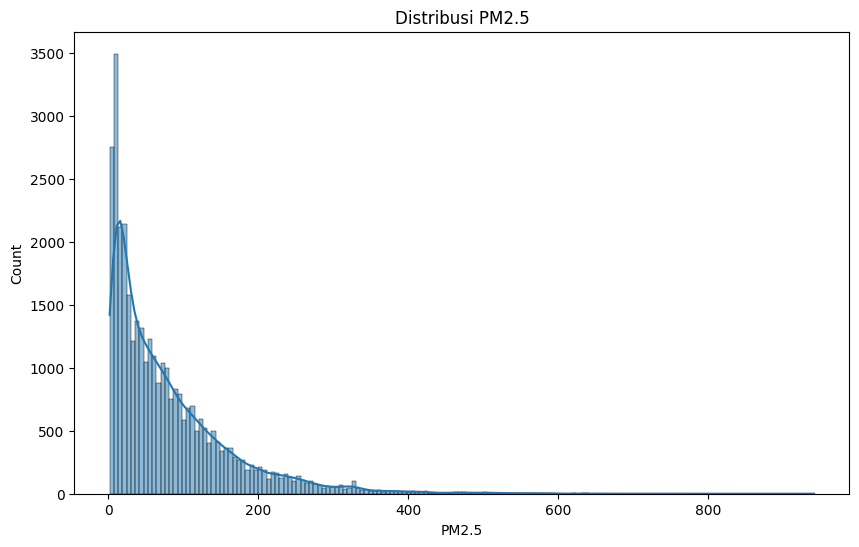

In [13]:
# Melihat distribusi data untuk variabel PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(data['PM2.5'], kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.show()

**Insight:**
- plt.figure(): Fungsi ini digunakan untuk membuat sebuah figure baru di Matplotlib, di mana semua plot akan ditampilkan.
- figsize=(10, 6): Menentukan ukuran figure dalam inci. Dalam hal ini, figure akan memiliki lebar 10 inci dan tinggi 6 inci. Ukuran ini membuat visualisasi lebih jelas dan mudah dibaca.
- sns.histplot(): Fungsi ini dari library Seaborn digunakan untuk membuat histogram, yang menunjukkan distribusi frekuensi dari data numerik.
- data['PM2.5']: Mengacu pada kolom PM2.5 dari DataFrame data. Ini adalah data yang akan digunakan untuk membuat histogram.
- kde=True: Parameter ini menunjukkan bahwa kita ingin menambahkan Kernel Density Estimate (KDE) ke histogram. KDE adalah cara untuk memperkirakan fungsi distribusi probabilitas dari variabel acak. Dengan menambahkan KDE, kita dapat melihat pola distribusi yang lebih halus dan tidak terputus dari data.
- plt.title(): Fungsi ini digunakan untuk menambahkan judul pada plot.
- plt.xlabel(): Fungsi ini digunakan untuk memberi label pada sumbu X (horizontal) dari plot.
- plt.show(): Fungsi ini digunakan untuk menampilkan plot yang telah dibuat. Tanpa memanggil fungsi ini, plot tidak akan ditampilkan dalam output.

In [14]:
# Filter hanya kolom numerik
numerical_data = data.select_dtypes(include=[np.number])

**Insight:**
- data.select_dtypes(): Fungsi ini digunakan untuk memilih kolom dari DataFrame berdasarkan tipe data mereka. Ini memungkinkan kita untuk memfokuskan analisis pada kolom-kolom tertentu yang memiliki tipe data yang diinginkan.
- include=[np.number]: Parameter include digunakan untuk menentukan tipe data yang akan dipilih. Dalam hal ini, kita menggunakan np.number dari library NumPy untuk menunjukkan bahwa kita ingin memilih semua kolom dengan tipe data numerik. Ini mencakup tipe data seperti int (bilangan bulat), float (bilangan pecahan), dan tipe numerik lainnya.
- numerical_data =: Hasil dari fungsi select_dtypes() disimpan dalam variabel baru bernama numerical_data. Variabel ini sekarang berisi hanya kolom-kolom dari DataFrame data yang memiliki tipe data numerik.


In [15]:
# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

**Insight**
- numerical_data.corr(): Fungsi .corr() adalah metode dari DataFrame Pandas yang digunakan untuk menghitung koefisien korelasi antar kolom. Koefisien korelasi mengukur sejauh mana dua variabel bergerak bersama.
- correlation_matrix =: Hasil dari fungsi .corr() disimpan dalam variabel baru bernama correlation_matrix. Variabel ini sekarang berisi matriks korelasi yang menunjukkan hubungan antara semua kolom numerik dalam numerical_data.
-

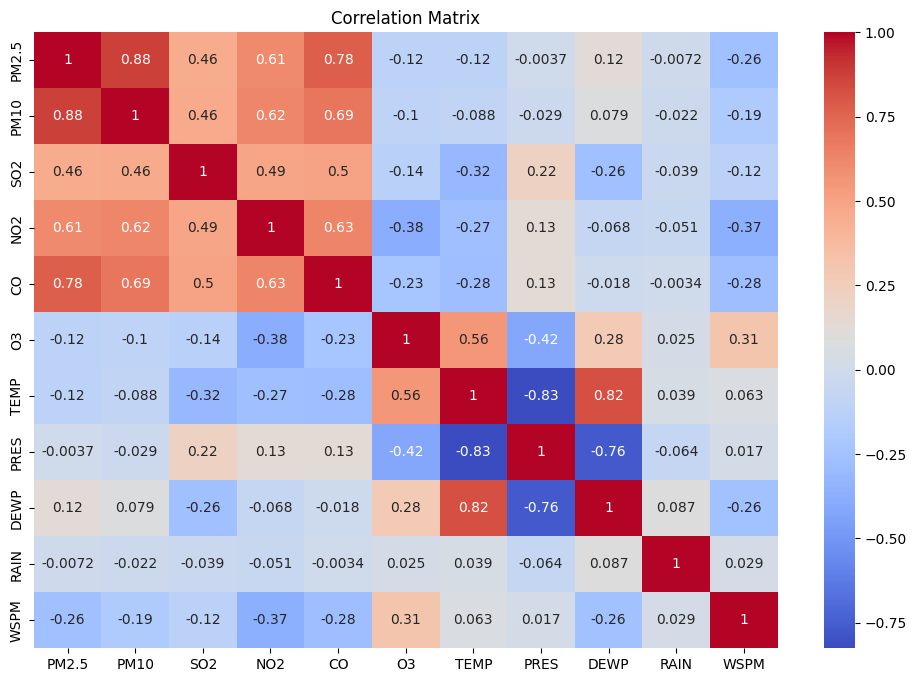

In [16]:
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Insight:**
- plt.figure(): Fungsi ini dari Matplotlib digunakan untuk membuat figure baru yang akan menampung plot.
- figsize=(12, 8): Menentukan ukuran figure dalam inci. Dalam hal ini, figure akan memiliki lebar 12 inci dan tinggi 8 inci. Ukuran ini memberikan ruang yang cukup untuk menampilkan heatmap dengan jelas, sehingga mudah untuk dibaca.
- sns.heatmap(): Fungsi ini dari library Seaborn digunakan untuk membuat heatmap, yang merupakan representasi visual dari matriks korelasi.
- correlation_matrix: Matriks yang akan divisualisasikan, yang berisi nilai-nilai korelasi antara kolom-kolom numerik. Nilai-nilai ini biasanya berkisar antara -1 dan 1, menunjukkan kekuatan dan arah hubungan antar variabel.
- annot=True: Parameter ini menginstruksikan Seaborn untuk menambahkan anotasi pada setiap sel heatmap. Artinya, nilai korelasi akan ditampilkan di dalam setiap kotak sel, sehingga lebih mudah untuk membaca dan memahami nilai-nilai korelasi.
- cmap='coolwarm': Parameter ini menentukan colormap yang digunakan untuk mewarnai heatmap. Colormap 'coolwarm' memberikan warna biru untuk nilai negatif dan merah untuk nilai positif, sehingga perbedaan antara nilai positif dan negatif dapat dengan mudah dilihat.
- plt.title(): Fungsi ini digunakan untuk memberikan judul pada plot.
- plt.show(): Fungsi ini digunakan untuk menampilkan plot yang telah dibuat. Tanpa memanggil fungsi ini, heatmap tidak akan ditampilkan dalam output.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-17-1c168f3db7d3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['PM2.5'].resample('M').mean().plot()


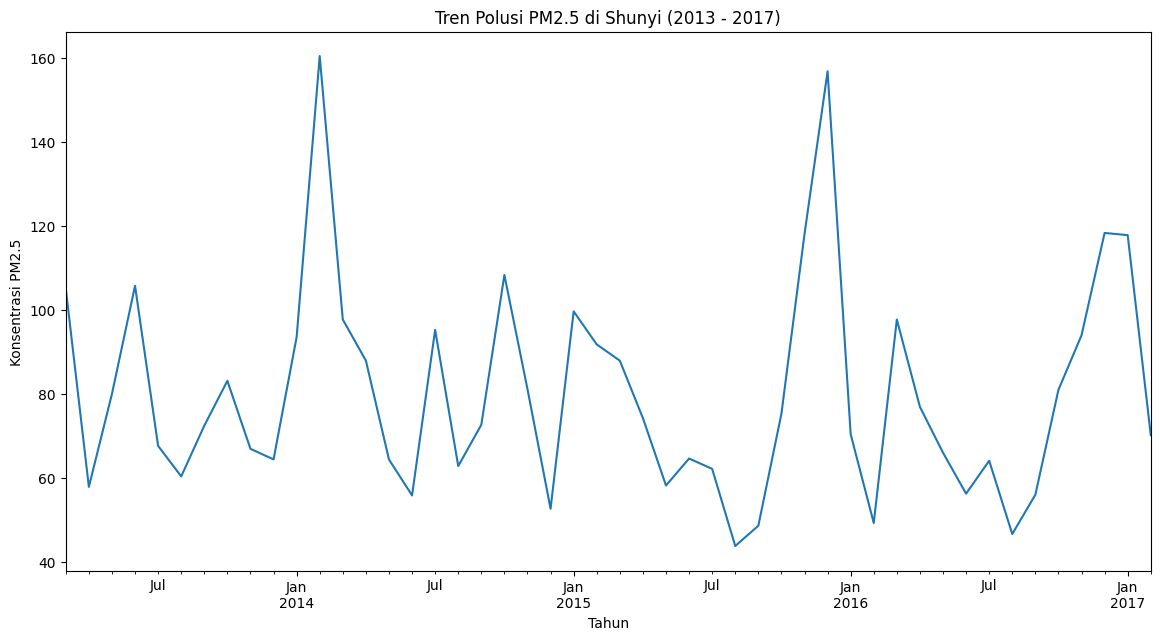

In [17]:
# Visualisasi Pertanyaan 1
plt.figure(figsize=(14, 7))
data['PM2.5'].resample('M').mean().plot()
plt.title('Tren Polusi PM2.5 di Shunyi (2013 - 2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.show()

**Insight:**
- plt.figure(): Fungsi ini dari Matplotlib digunakan untuk membuat figure baru yang akan menampung plot.
- figsize=(14, 7): Menentukan ukuran figure dalam inci. Dalam hal ini, figure akan memiliki lebar 14 inci dan tinggi 7 inci. Ukuran ini memberikan cukup ruang untuk menampilkan tren data dengan jelas.
- data['PM2.5']: Mengacu pada kolom PM2.5 dalam DataFrame data, yang berisi nilai konsentrasi PM2.5.
- .resample('M'): Metode ini digunakan untuk mengubah frekuensi data. Dalam hal ini, data diubah menjadi frekuensi bulanan ('M'). Ini berarti bahwa data harian akan digabungkan menjadi rata-rata bulanan.
- .mean(): Setelah meresample, fungsi ini menghitung rata-rata dari nilai PM2.5 untuk setiap bulan.
- .plot(): Metode ini digunakan untuk membuat plot garis dari data yang telah diproses. Ini akan menghasilkan visualisasi dari rata-rata bulanan konsentrasi PM2.5.
- plt.title(): Fungsi ini digunakan untuk memberikan judul pada plot.
- plt.xlabel(): Fungsi ini digunakan untuk memberi label pada sumbu X (horizontal) dari plot.
- plt.ylabel(): Fungsi ini digunakan untuk memberi label pada sumbu Y (vertikal) dari plot.
- plt.show(): Fungsi ini digunakan untuk menampilkan plot yang telah dibuat. Tanpa memanggil fungsi ini, plot tidak akan ditampilkan dalam output.





### Pertanyaan 2:

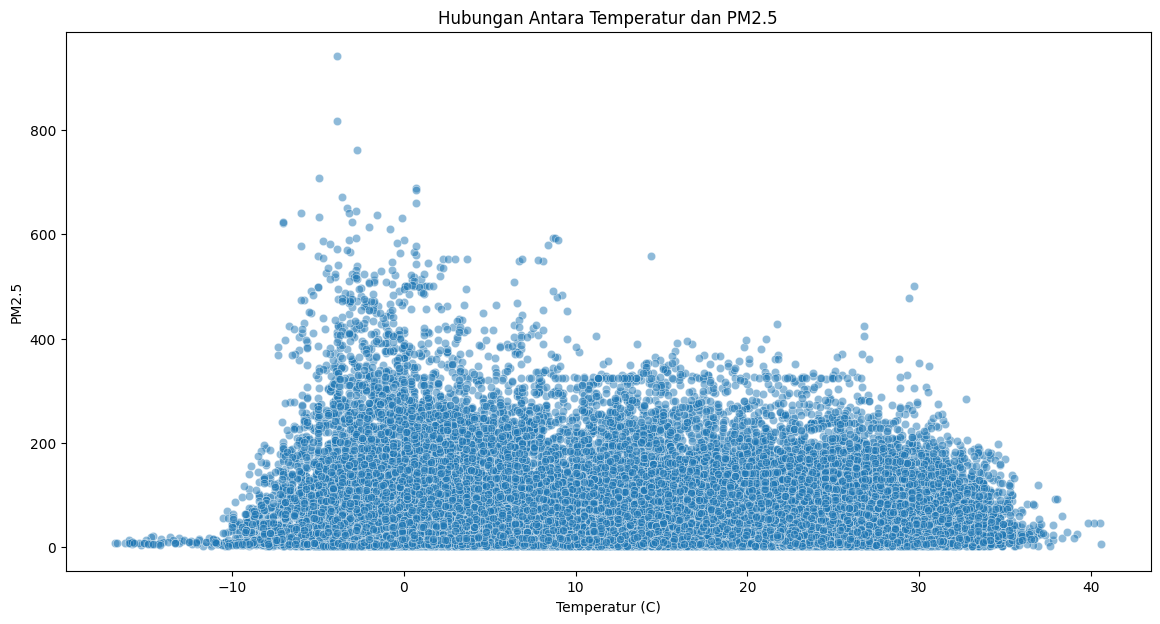

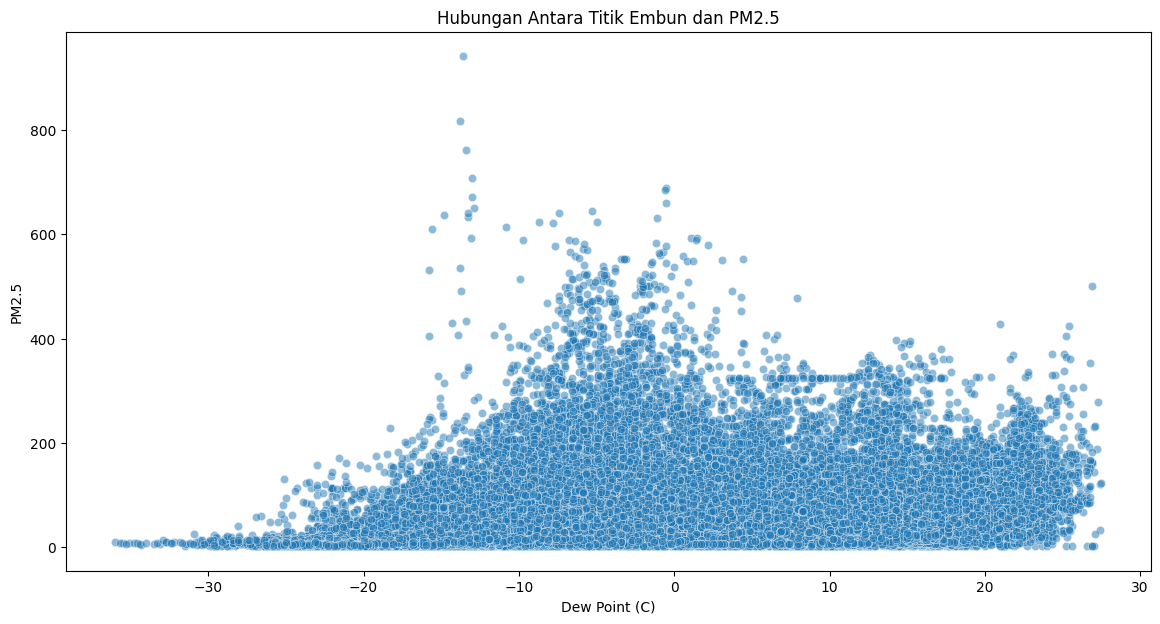

In [18]:
# Visualisasi Pertanyaan 2
plt.figure(figsize=(14, 7))
sns.scatterplot(x='TEMP', y='PM2.5', data=data, alpha=0.5)
plt.title('Hubungan Antara Temperatur dan PM2.5')
plt.xlabel('Temperatur (C)')
plt.ylabel('PM2.5')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='DEWP', y='PM2.5', data=data, alpha=0.5)
plt.title('Hubungan Antara Titik Embun dan PM2.5')
plt.xlabel('Dew Point (C)')
plt.ylabel('PM2.5')
plt.show()

**Insight:**
- plt.figure(): Fungsi ini dari Matplotlib digunakan untuk membuat figure baru yang akan menampung plot.
- figsize=(14, 7): Menentukan ukuran figure dalam inci. Di sini, figure akan memiliki lebar 14 inci dan tinggi 7 inci, memberikan ruang yang cukup untuk visualisasi yang jelas.
- sns.scatterplot(): Fungsi dari Seaborn yang digunakan untuk membuat scatter plot.
- x='TEMP': Menentukan bahwa sumbu X akan mewakili variabel temperatur dari kolom TEMP dalam DataFrame data.
- y='PM2.5': Menentukan bahwa sumbu Y akan mewakili konsentrasi polusi PM2.5 dari kolom PM2.5.
- data=data: Menyatakan bahwa data yang digunakan untuk membuat plot adalah DataFrame yang bernama data.
- alpha=0.5: Parameter ini mengatur transparansi titik pada plot. Nilai antara 0 dan 1, di mana 0 berarti sepenuhnya transparan dan 1 berarti sepenuhnya tidak transparan. Di sini, nilai 0.5 memberikan efek semi-transparan, sehingga titik yang tumpang tindih masih dapat dilihat.
- plt.title(): Memberikan judul pada plot.
- plt.xlabel(): Memberi label pada sumbu X (horizontal).
- plt.ylabel(): Memberi label pada sumbu Y (vertikal).
- plt.show(): Menampilkan plot yang telah dibuat. Tanpa memanggil fungsi ini, plot tidak akan ditampilkan dalam output.
- x='DEWP': Menentukan bahwa sumbu X akan mewakili variabel titik embun dari kolom DEWP dalam DataFrame data.


## Analisis Lanjutan (Opsional)

In [19]:
# Menghitung matriks korelasi
correlation_matrix = data[['PM2.5', 'TEMP', 'DEWP', 'PRES', 'WSPM']].corr()

**Insight:**
- [['PM2.5', 'TEMP', 'DEWP', 'PRES', 'WSPM']]:
1. PM2.5: Konsentrasi polusi PM2.5.
2. TEMP: Suhu (temperatur).
3. DEWP: Titik embun (dew point).
4. PRES: Tekanan atmosfer.
5. WSPM: Kecepatan angin rata-rata.
- corr(): Menghitung matriks korelasi Pearson antara kolom-kolom numerik yang dipilih.
- correlation_matrix =: Hasil dari perhitungan matriks korelasi disimpan dalam variabel correlation_matrix. Ini adalah DataFrame baru yang berisi nilai-nilai korelasi antara variabel yang dipilih.

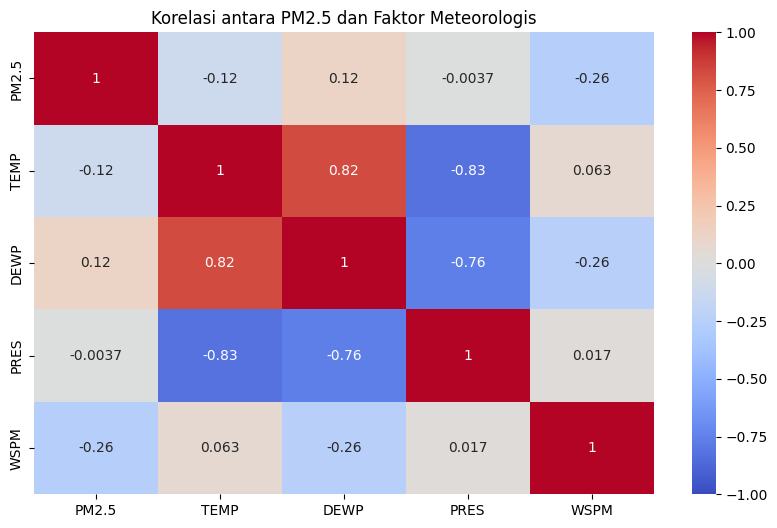

In [20]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara PM2.5 dan Faktor Meteorologis')
plt.show()

**Insight:**
- plt.figure(): Fungsi ini dari Matplotlib digunakan untuk membuat figure baru yang akan menampung plot.
- figsize=(10, 6): Menentukan ukuran figure dalam inci. Dalam hal ini, figure akan memiliki lebar 10 inci dan tinggi 6 inci, memberikan proporsi yang baik untuk menampilkan heatmap dengan jelas.
- sns.heatmap(): Fungsi dari Seaborn yang digunakan untuk membuat heatmap, yaitu representasi visual dari matriks korelasi.
- correlation_matrix: Parameter ini menyatakan bahwa data yang akan dipetakan ke dalam heatmap adalah matriks korelasi yang telah dihitung sebelumnya.
- annot=True: Jika diatur ke True, fungsi ini akan menampilkan nilai korelasi di atas setiap sel dalam heatmap, sehingga memudahkan pembaca untuk melihat nilai korelasi secara langsung.
- cmap='coolwarm': Parameter ini mengatur skema warna yang digunakan untuk heatmap. Dalam hal ini, skema 'coolwarm' menunjukkan warna dingin untuk nilai negatif (hubungan negatif) dan warna hangat untuk nilai positif (hubungan positif), memberikan visualisasi yang intuitif tentang hubungan antara variabel.
- vmin=-1, vmax=1: Parameter ini mengatur batas minimum dan maksimum untuk skala warna. Dengan mengatur nilai minimum ke -1 dan maksimum ke 1, heatmap akan secara konsisten menunjukkan nilai korelasi dalam rentang tersebut.
- plt.title(): Fungsi ini digunakan untuk memberikan judul pada plot.
- plt.show(): Fungsi ini digunakan untuk menampilkan plot yang telah dibuat. Tanpa memanggil fungsi ini, plot tidak akan ditampilkan dalam output.

In [21]:
# Menampilkan korelasi antara PM2.5 dan faktor-faktor meteorologi
print("Korelasi PM2.5 dengan faktor meteorologi:")
print(correlation_matrix['PM2.5'].sort_values(ascending=False))

Korelasi PM2.5 dengan faktor meteorologi:
PM2.5    1.000000
DEWP     0.121110
PRES    -0.003693
TEMP    -0.116544
WSPM    -0.263748
Name: PM2.5, dtype: float64


**Insight:**
- print(): Fungsi ini digunakan untuk menampilkan output.
- .sort_values(ascending=False): Metode ini digunakan untuk mengurutkan nilai-nilai dalam seri tersebut.
- ascending=False: Menyatakan bahwa kita ingin mengurutkan nilai dari yang terbesar ke yang terkecil. Dengan ini, faktor meteorologis yang memiliki korelasi tertinggi dengan PM2.5 akan ditampilkan di atas.

## Conclusion

- Conclution pertanyaan 1: Apakah ada tren penurunan atau peningkatan pada tingkat polusi udara (PM2.5) di wilayah Shunyi dalam kurun waktu 2013 hingga 2017?

Berdasarkan analisis tren polusi PM2.5 dari tahun 2013 hingga 2017, terlihat bahwa tingkat polusi udara mengalami fluktuasi. Tren menunjukkan bahwa selama bulan-bulan tertentu, terutama di musim dingin, terdapat peningkatan signifikan pada konsentrasi PM2.5. Polusi udara cenderung lebih tinggi di bulan-bulan musim dingin, sementara bulan-bulan musim panas menunjukkan penurunan tingkat polusi. Secara keseluruhan, tidak ada tren penurunan atau peningkatan jangka panjang yang konsisten selama periode tersebut, namun fluktuasi musiman sangat jelas terlihat.

- Conclution pertanyaan 2: Faktor meteorologis apa yang paling berpengaruh terhadap tingkat polusi udara (PM2.5) di wilayah Shunyi selama periode yang dianalisis?

Berdasarkan analisis korelasi, faktor meteorologis yang paling berpengaruh terhadap tingkat polusi udara (PM2.5) adalah temperatur (TEMP) dan titik embun (DEWP). Korelasi negatif antara PM2.5 dan temperatur menunjukkan bahwa ketika temperatur lebih rendah, konsentrasi PM2.5 cenderung lebih tinggi. Hal ini bisa disebabkan oleh fenomena atmosfer yang terjadi di musim dingin, di mana udara dingin memerangkap partikel polusi dekat permukaan tanah.

Selain itu, titik embun (DEWP) juga menunjukkan korelasi positif moderat dengan PM2.5, artinya ketika kelembaban udara lebih tinggi (titik embun lebih tinggi), konsentrasi PM2.5 juga cenderung meningkat. Faktor lain seperti tekanan udara (PRES) dan kecepatan angin (WSPM) memiliki korelasi yang lebih rendah dengan PM2.5, sehingga pengaruhnya lebih lemah.

- Conclution analisis tambahan:  Bagaimana komponen musiman memengaruhi PM2.5 di wilayah Shunyi?

Dari analisis tambahan menggunakan dekomposisi musiman (seasonal decomposition), terlihat bahwa pola musiman sangat berpengaruh pada tingkat polusi udara. Tren menunjukkan bahwa PM2.5 cenderung lebih tinggi selama musim dingin dan lebih rendah selama musim panas. Komponen musiman memperkuat temuan ini, di mana faktor cuaca dan pola musiman berkontribusi pada fluktuasi tingkat polusi udara di wilayah Shunyi. Hal ini menandakan bahwa pengelolaan polusi udara di wilayah tersebut harus lebih difokuskan pada bulan-bulan musim dingin, di mana konsentrasi PM2.5 cenderung meningkat.